In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from train import run_flsc, FlscConfig, create_config, get_data_for_config, run_fedprox

In [2]:
from train import FedProxConfig

# conf = create_config(
#     algorithm="ifca",
#     dataset="cifar10",
#     rounds=100,
#     epochs=5,
#     n_clients=100,
#     clients_per_round=1.0,
#     clusters=4,
#     clusters_per_client=3,
#     imbalance_type="label_distribution",
#     imbalance_value=10,
#     penalty=0,
# )

conf = FedProxConfig(
    algorithm="fedavg",
    dataset="mnist",
    rounds=50,
    epochs=5,
    clients_per_round=1.0,
    imbalance_type="label_distribution",
    imbalance_value=0.1,
    penalty=0,
    n_clients=80
)

In [3]:
train, test = get_data_for_config(conf.dataset, conf.n_clients, conf.imbalance_type, conf.imbalance_value, seed=42, logfile=None)

In [4]:
def dataset_lens(ds):
    return np.array(list(map(lambda dl: len(dl.dataset), ds)))

In [5]:
train_lens = dataset_lens(train)
test_lens = dataset_lens(test)

In [6]:
from datasets.imbalancing.stats import li_ldi_qi
datasets = list(map(lambda dl: dl.dataset, train))
li, ldi, qi = li_ldi_qi(datasets)

In [7]:
imbalances = pd.DataFrame({
    "client": range(len(li)),
    "imbalance_type": "label_distribution",
    "imbalance_value": 0.1,
    "label_imbalance": li,
    "label_distribution_imbalance": ldi,
    "quantity_imbalance": qi,
})
imbalances

,client,imbalance_type,imbalance_value,label_imbalance,label_distribution_imbalance,quantity_imbalance
0,0,label_distribution,0.1,10.0,0.568513,0.029981
1,1,label_distribution,0.1,28.0,0.605694,0.059963
2,2,label_distribution,0.1,936.0,0.676360,1.559026
3,3,label_distribution,0.1,891.0,0.618392,1.852176
4,4,label_distribution,0.1,105.0,0.532170,0.359775
...,...,...,...,...,...,...
75,75,label_distribution,0.1,102.0,0.468167,0.353113
76,76,label_distribution,0.1,1730.0,0.693041,2.884864
77,77,label_distribution,0.1,369.0,0.643145,0.696232
78,78,label_distribution,0.1,489.0,0.556610,1.120966


<Axes: ylabel='Count'>

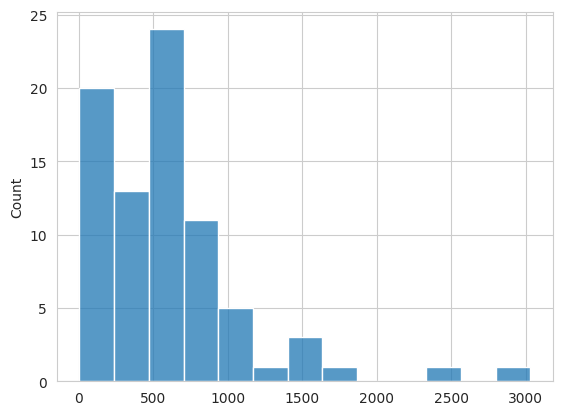

In [8]:
sns.histplot(train_lens)

<Axes: ylabel='Count'>

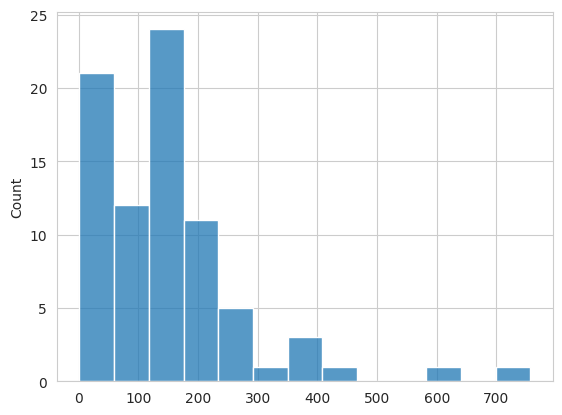

In [9]:
sns.histplot(test_lens)

In [10]:
results = run_flsc(conf, train, test) if conf.algorithm in ["ifca", "flsc"] else run_fedprox(conf, train, test)

Clients per round: 80


Round:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

Client:   0%|          | 0/80 [00:00<?, ?it/s]

In [11]:
results = results.as_dataframe()
results

,round,client,stage,variable,value
0,1,0,train,loss,2.298333
1,1,0,train,n_samples,18.000000
2,1,0,test,loss,2.331877
3,1,0,test,f1,0.000000
4,1,0,test,n_samples,4.000000
...,...,...,...,...,...
19995,50,79,train,loss,0.237281
19996,50,79,train,n_samples,31.000000
19997,50,79,test,loss,0.517040
19998,50,79,test,f1,0.722222


In [15]:
df = results.query("stage == 'train' and variable == 'loss'")
# df = results.query("stage == 'test' and variable == 'f1'")

<Axes: xlabel='round', ylabel='value'>

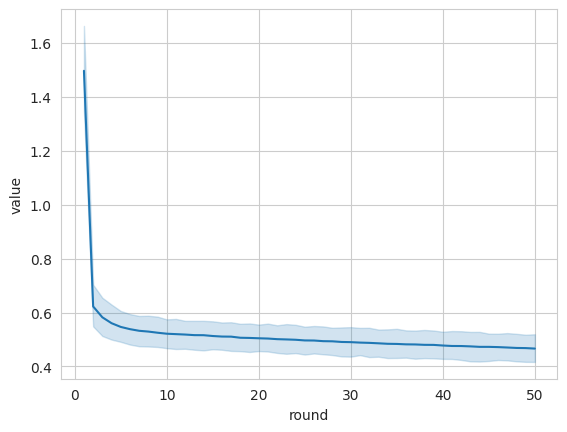

In [16]:
sns.lineplot(df, x="round", y="value")

In [14]:
df = results.pivot(values="value", index=["round", "client", "stage"], columns="variable")\
    .reset_index()

df["cluster_identities"] = df["cluster_identities"].astype(int)

df = df.query("stage == 'test'")\
    .drop(columns=["stage", "client"])\
    .groupby(["round", "cluster_identities"])\
    .mean()\
    .reset_index()

KeyError: 'cluster_identities'

In [ ]:
sns.lineplot(df, x="round", y="f1")

In [ ]:
df = results.pivot(values="value", index=["round", "client", "stage"], columns="variable")\
    .reset_index()

df["cluster_identities"] = df["cluster_identities"].astype(int)

df = df.query("stage == 'train'")\
    .drop(columns=["stage", "client"])\
    .groupby(["round", "cluster_identities"])\
    .size()\
    .reset_index()\
    .rename(columns={0: "count"})

In [ ]:
df 

In [ ]:
import plotly.express as px
px.area(df, x="round", y="count", color="cluster_identities")